# AUC Hypothesis tests

Suppose you build a predictive model on a small sample. It has a small AUC/ROC. Can you state if it is significantly better than chance?

What is the distribution of ROC/AUC scores under the null hypothesis?

In [1]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Let's start at 50% positive class, 100 data points.

In [2]:
def get_auc_sample(y_true):
    y_score = np.random.choice(np.arange(len(y_true)),
                               len(y_true),
                               replace=False)
    return roc_auc_score(y_true, y_score)

def get_auc_samples(p_pos, n_pts, n_samples):
    n_pos = int(p_pos * n_pts)
    n_neg = n_pts - n_pos
    print(n_pos, n_neg)
    y_true = np.concatenate([np.zeros(n_neg), np.ones(n_pos)])
    print(y_true)
    aucs = np.zeros(n_samples)
    for i in range(n_samples):
        aucs[i] = get_auc_sample(y_true)
    return aucs

In [3]:
aucs = get_auc_samples(0.5, 8, 10000)

4 4
[0. 0. 0. 0. 1. 1. 1. 1.]


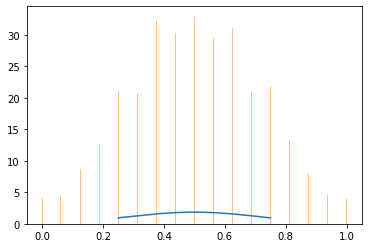

In [4]:
fig, ax = plt.subplots()
xpts = np.linspace(0.25, 0.75, 500)
ax.plot(xpts, stats.norm(aucs.mean(), aucs.std()).pdf(xpts))
ax.hist(aucs, bins=300, alpha=0.5, density=True);

In [5]:
np.unique(aucs, return_counts=True)

(array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 array([ 134,  146,  291,  420,  704,  690, 1071, 1010, 1096,  982, 1037,
         700,  728,  446,  263,  152,  130]))

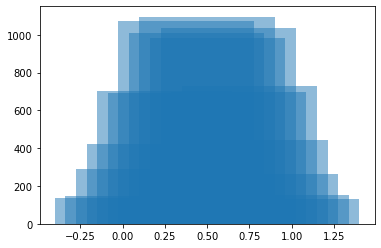

In [6]:
fig, ax = plt.subplots()
ax.plot(xpts, stats.norm(aucs.mean(), aucs.std()).pdf(xpts))
ax.bar(*np.unique(aucs, return_counts=True),
        alpha=0.5);

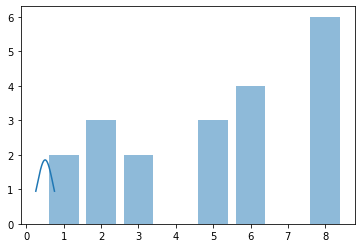

In [7]:
fig, ax = plt.subplots()
ax.plot(xpts, stats.norm(aucs.mean(), aucs.std()).pdf(xpts))
ax.bar([1,2,3,5,6,8], [2,3,2,3,4,6],
        alpha=0.5);

Or we could do a bar graph which would look better.

But clearly it's not binomial. I wonder what the distribution is?

In [8]:
p_pos = 0.5
n_pts = 100
n_pos = int(p_pos * n_pts)
n_neg = n_pts - n_pos
y_true = np.concatenate([np.zeros(n_neg), np.ones(n_pos)])

In [9]:
n_samples = 10000
aucs = np.zeros(n_samples)
for i in range(n_samples):
    y_score = np.random.choice(np.arange(n_pts), n_pts, replace=False)
    aucs[i] = roc_auc_score(y_true, y_score)

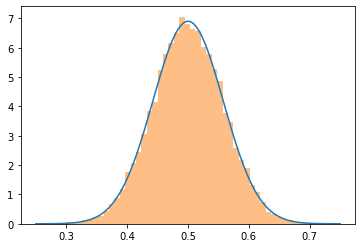

In [10]:
fig, ax = plt.subplots()
xpts = np.linspace(0.25, 0.75, 500)
ax.plot(xpts, stats.norm(aucs.mean(), aucs.std()).pdf(xpts))
ax.hist(aucs, bins=50, alpha=0.5, density=True);

For later: k-fold cross-validation. Distribution of modeling distribution of AUCs of a model built under different samples (sample statistic)